## Part 1

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib import dates as mdates

In [2]:
import pandas as pd
df = pd.read_csv('london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0


In [3]:
#Add a datetime column based on the string in the "date" column
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03


In [4]:
df = df.set_index('datetime')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [5]:
df = df.drop(columns = ['date', 'cloud_cover', 'sunshine', 'global_radiation', 'pressure'])
df

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
1979-01-01,2.3,-4.1,-7.5,0.4,9.0
1979-01-02,1.6,-2.6,-7.5,0.0,8.0
1979-01-03,1.3,-2.8,-7.2,0.0,4.0
1979-01-04,-0.3,-2.6,-6.5,0.0,2.0
1979-01-05,5.6,-0.8,-1.4,0.0,1.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,NaN
2020-12-28,3.6,1.1,-1.3,0.2,NaN
2020-12-29,4.1,2.6,1.1,0.0,NaN


In [6]:
df = df.loc['2000' : '2020']
df

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,NaN
2020-12-28,3.6,1.1,-1.3,0.2,NaN
2020-12-29,4.1,2.6,1.1,0.0,NaN


In [7]:
# Impute missing values
df.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

In [8]:
## interpolate temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

/var/folders/f5/bdzchg655zxf5v7h5fc_qxfh0000gn/T/ipykernel_65165/3332622161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_temp'] = df['mean_temp'].interpolate()
/var/folders/f5/bdzchg655zxf5v7h5fc_qxfh0000gn/T/ipykernel_65165/3332622161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_temp'] = df['max_temp'].interpolate()
/var/folders/f5/bdzchg655zxf5v7h5fc_qxfh0000gn/T/ipykernel_65165/3332622161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [9]:
df.isna().sum()

max_temp            0
mean_temp           0
min_temp            0
precipitation     390
snow_depth       1752
dtype: int64

In [10]:
# I'm asssuming that a missing value for these means there was no precipitation/snow
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)
df.isna().sum()

/var/folders/f5/bdzchg655zxf5v7h5fc_qxfh0000gn/T/ipykernel_65165/576385734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precipitation'] = df['precipitation'].fillna(0)
/var/folders/f5/bdzchg655zxf5v7h5fc_qxfh0000gn/T/ipykernel_65165/576385734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['snow_depth'] = df['snow_depth'].fillna(0)


max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

## Part 2

### Q1: What time period had the most precipitation between 2000 through 2010?

In [11]:
precip = ['precipitation']
plot_df  = df.loc["2000": "2010",precip]
plot_df

,precipitation
datetime,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8
...,...
2010-12-27,5.0
2010-12-28,0.4
2010-12-29,1.4


In [12]:
plot_df = plot_df.resample("MS").mean()
plot_df.name = 'Resampled'
plot_df.head()

,precipitation
datetime,
2000-01-01,0.461290
2000-02-01,2.144828
2000-03-01,0.432258
2000-04-01,2.393333
2000-05-01,2.206452


In [14]:
max_prec = plot_df['precipitation'].idxmax()
max_prec

Timestamp('2009-11-01 00:00:00', freq='MS')

- The date with the most precipication was November 1st, 2009

In [15]:
plot_df.loc['2009-11-01']

precipitation    4.613333
Name: 2009-11-01 00:00:00, dtype: float64

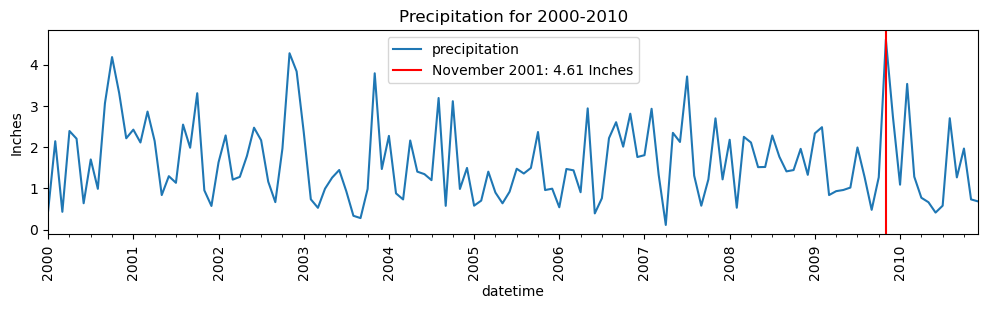

In [16]:
fig, ax = plt.subplots(figsize = (12,3))
plot_df.plot(ax=ax)
ax.set(title = 'Precipitation for 2000-2010', ylabel = 'Inches')
ax.axvline(x = max_prec, color = 'red', label = 'November 2001: 4.61 Inches')

fig.autofmt_xdate(rotation = 90, ha = "center")
ax.legend();

### Q2: Which year between 2000-2020 had the coolest average temperature?

In [17]:
temp = ['mean_temp']
plot_df  = df.loc["2000": "2020",temp]
plot_df

,mean_temp
datetime,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4
...,...
2020-12-27,7.5
2020-12-28,1.1
2020-12-29,2.6


In [18]:
plot_df = plot_df.resample("AS").mean()
plot_df.name = 'Resampled'
plot_df.head()

,mean_temp
datetime,
2000-01-01,11.575683
2001-01-01,11.331507
2002-01-01,12.084247
2003-01-01,12.114521
2004-01-01,11.900683


In [19]:
min_temp = plot_df['mean_temp'].idxmin()
min_temp

Timestamp('2010-01-01 00:00:00', freq='AS-JAN')

- The max mean temp occurred on January 1st, 2010.

In [20]:
plot_df.loc['2010-01-01']

mean_temp    10.657397
Name: 2010-01-01 00:00:00, dtype: float64

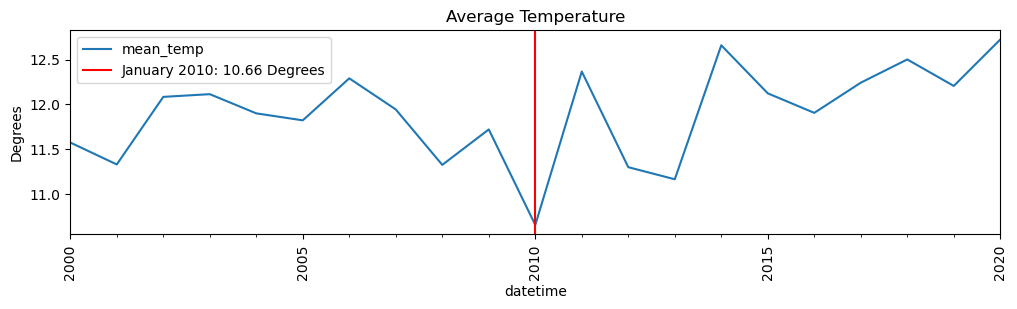

In [21]:
fig, ax = plt.subplots(figsize = (12,3))
plot_df.plot(ax=ax)
ax.set(title = 'Average Temperature', ylabel = 'Degrees')
ax.axvline(x = min_temp, color = 'red', label = 'January 2010: 10.66 Degrees')

fig.autofmt_xdate(rotation = 90, ha = "center")
ax.legend();